In [11]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
cwd = os.getcwd()
root_directory = os.path.dirname(os.getcwd())

In [13]:
df_all = pd.read_csv(f"{root_directory}/../data/1_all_data.csv")
# check if the plot folder exists
if not os.path.exists(f"{root_directory}/../data_analysis/plots"):
    print("Creating plots folder")
    os.mkdir(f"{root_directory}/../data_analysis/plots")
else:
    print("plots folder exists")

df_all.info()

plots folder exists
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4806813 entries, 0 to 4806812
Data columns (total 35 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   area_percent    float64
 2   update_time     float64
 3   delta_time      float64
 4   plan_length     int64  
 5   replan_count    int64  
 6   logging_time    float64
 7   frame_count     int64  
 8   known_area      int64  
 9   success         bool   
 10  seed            int64  
 11  draw_sim        bool   
 12  log_plots       bool   
 13  use_threads     bool   
 14  n_bots          int64  
 15  grid_thickness  int64  
 16  screen_width    int64  
 17  screen_height   int64  
 18  min_room_size   int64  
 19  max_room_size   int64  
 20  wall_ratio      float64
 21  method          object 
 22  start_scenario  object 
 23  goal_scenario   object 
 24  experiment_ID   int64  
 25  loss_type       object 
 26  execution_date  object 
 27  epsilon_0       float

In [14]:
df_all.shape

(4806813, 35)

In [15]:
# drop all columns with NaN values
df_all = df_all.dropna(axis=1)
df_all.shape

(4806813, 27)

In [16]:
df_all['method'] = df_all['method'].astype('category')
df_all['method'] = df_all['method'].apply(lambda x: x.replace('_', ' ').title())

# remove all _ from the column names
df_all.columns = df_all.columns.str.replace('_', ' ')
# make all the columns tital like
df_all.columns = df_all.columns.str.title()



In [17]:
df_all.describe()


,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Logging Time,Frame Count,Known Area,Seed,N Bots,Grid Thickness,Screen Width,Screen Height,Min Room Size,Max Room Size,Wall Ratio,Experiment Id
count,4.806813e+06,4.806813e+06,4.806813e+06,4.806813e+06,4.806813e+06,4.806813e+06,4.806813e+06,4.806813e+06,4.806813e+06,4.806813e+06,4.806813e+06,4806813.0,4806813.0,4806813.0,4.806813e+06,4806813.0,4.806813e+06,4.806813e+06
mean,1.254203e+06,8.116371e-01,3.433480e-02,1.642114e+00,6.173413e+01,1.203988e+02,2.149366e-04,5.988545e+01,7.304733e+02,3.441051e+01,5.581772e+00,10.0,300.0,300.0,6.036506e+01,200.0,2.300099e-01,2.540605e+04
std,7.776802e+05,2.306176e-01,3.790196e-02,1.193016e+00,3.850025e+01,1.250144e+02,1.450231e-03,5.256998e+01,2.075559e+02,2.841845e+00,1.610814e+00,0.0,0.0,0.0,1.630660e+01,0.0,4.038910e-02,1.606427e+04
min,0.000000e+00,4.444444e-03,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,3.000000e+01,4.000000e+00,10.0,300.0,300.0,4.000000e+01,200.0,1.500000e-01,0.000000e+00
25%,6.008510e+05,7.033333e-01,1.000000e-02,6.800000e-01,3.400000e+01,5.200000e+01,0.000000e+00,2.300000e+01,6.330000e+02,3.200000e+01,4.000000e+00,10.0,300.0,300.0,4.000000e+01,200.0,1.922222e-01,1.059700e+04
50%,1.201703e+06,9.177778e-01,2.000000e-02,1.460000e+00,5.500000e+01,9.200000e+01,0.000000e+00,4.700000e+01,8.260000e+02,3.400000e+01,6.000000e+00,10.0,300.0,300.0,6.000000e+01,200.0,2.222222e-01,2.408600e+04
75%,1.802554e+06,9.900000e-01,4.000000e-02,2.370000e+00,8.300000e+01,1.480000e+02,0.000000e+00,8.100000e+01,8.910000e+02,3.700000e+01,6.000000e+00,10.0,300.0,300.0,8.000000e+01,200.0,2.733333e-01,3.948800e+04
max,2.905758e+06,1.000000e+00,7.200000e-01,1.115000e+01,4.020000e+02,2.379000e+03,1.000000e-02,5.990000e+02,9.000000e+02,3.900000e+01,8.000000e+00,10.0,300.0,300.0,8.000000e+01,200.0,2.988889e-01,5.174900e+04


In [18]:
# conver columns to category that have less than 10 unique values
for col in df_all.columns:
    if df_all[col].nunique() < 20:
        df_all[col] = df_all[col].astype('category')

In [19]:
df_all.columns
# '''
# 'Unnamed: 0', 'Area Percent', 'Update Time', 'Delta Time',
#        'Plan Length', 'Replan Count', 'Logging Time', 'Frame Count',
#        'Known Area', 'Success', 'Seed', 'Draw Sim', 'Log Plots', 'Use Threads',
#        'N Bots', 'Grid Thickness', 'Screen Width', 'Screen Height',
#        'Min Room Size', 'Max Room Size', 'Wall Ratio', 'Method',
#        'Start Scenario', 'Goal Scenario', 'Experiment Id', 'Loss Type',
#        'Execution Date']
#        '''

Index(['Unnamed: 0', 'Area Percent', 'Update Time', 'Delta Time',
       'Plan Length', 'Replan Count', 'Logging Time', 'Frame Count',
       'Known Area', 'Success', 'Seed', 'Draw Sim', 'Log Plots', 'Use Threads',
       'N Bots', 'Grid Thickness', 'Screen Width', 'Screen Height',
       'Min Room Size', 'Max Room Size', 'Wall Ratio', 'Method',
       'Start Scenario', 'Goal Scenario', 'Experiment Id', 'Loss Type',
       'Execution Date'],
      dtype='object')

In [21]:
df_all['M'] = df_all['Method'].apply(lambda x: ''.join([str(i[0]) for i in x.split(' ')]))

wost_case = df_all.groupby(['M']).max()[['Frame Count', 'Replan Count','Delta Time', 'Update Time']].sort_values(by='Frame Count')
with open(f"{root_directory}/../data_analysis/plots/worst_case.txt", 'w') as f:
    f.write(wost_case.to_latex())
wost_case

/tmp/ipykernel_70692/2634451610.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  wost_case = df_all.groupby(['M']).max()[['Frame Count', 'Replan Count','Delta Time', 'Update Time']].sort_values(by='Frame Count')
/tmp/ipykernel_70692/2634451610.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(wost_case.to_latex())


,Frame Count,Replan Count,Delta Time,Update Time
M,,,,
V.F.H.C.,132,429,7.95,0.55
D.F.C.,135,476,7.79,0.34
E.G.U.,155,356,7.53,0.68
D.E.G.U.,176,447,11.15,0.61
U.C.,184,560,10.24,0.72
E.G.F.,206,448,6.04,0.68
V.F.C.,214,1199,6.26,0.45
F.C.,232,527,6.53,0.64
G.,255,449,5.77,0.51


<AxesSubplot:xlabel='Frame Count', ylabel='Area Percent'>

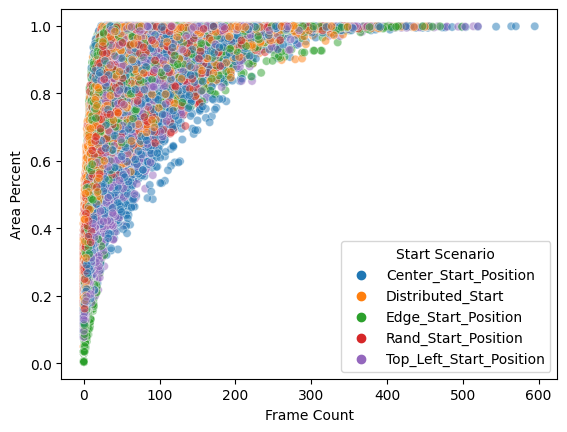

In [22]:
sns.scatterplot(x="Frame Count",y='Area Percent', hue="Start Scenario", data=df_all.sample(108_805), alpha=.5,)
# df_all.groupby('Start Scenario')

<AxesSubplot:xlabel='Frame Count', ylabel='Area Percent'>

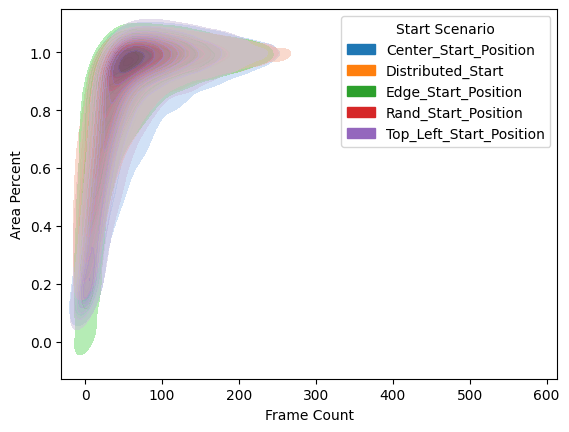

In [23]:
sns.kdeplot(x="Frame Count",y='Area Percent', hue="Start Scenario", 
            data=df_all.sample(108_805), alpha=.5,
            fill=True
            )

/tmp/ipykernel_70692/1616129651.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data= df_all.sample(108_805)[df_all['Area Percent'] == 0.5]
/tmp/ipykernel_70692/1616129651.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data= df_all.sample(108_805)[df_all['Area Percent'] == 0.75]


<AxesSubplot:xlabel='Frame Count', ylabel='Density'>

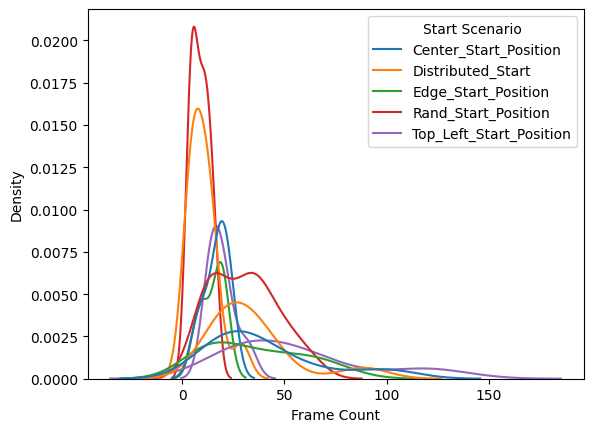

In [24]:
sns.kdeplot(x="Frame Count", hue="Start Scenario",
    data= df_all.sample(108_805)[df_all['Area Percent'] == 0.5]
)

sns.kdeplot(x="Frame Count", hue="Start Scenario",
    data= df_all.sample(108_805)[df_all['Area Percent'] == 0.75]
)

In [25]:
def my_kdys_by_percent(x_name="Frame Count", col = "Area Percent", group_hue="Start Scenario",
                       linspace_aranage=np.linspace(0.5, 0.9999, 4), smaple_size=108_805):

    sns.set_theme(style="white")

    # Set up the matplotlib figure
    f, axes = plt.subplots(2, 2, figsize=(9, 9), sharex=True, sharey=True)

    # Rotate the starting point around the cubehelix hue circle
    for ax, s in zip(axes.flat, linspace_aranage):
        print(s)
        plot = sns.kdeplot(x=x_name, hue=group_hue,
            data= df_all.sample(smaple_size)[df_all[col] == s],
            ax=ax
        )
        # get the colors 
        colors = [ax.get_lines()[i].get_color() for i in range(len(ax.get_lines()))]
        # # add tittal with 2 decimal places
        ax.set_title(f"'{col}': {s:.2f}")

        # # draw a vertical line at the mean
        # for i, [name, ger] in enumerate(df_all.groupby(group_hue)):
        #     cur_percent = ger[ger[group_hue] == s]
            
        #     ax.axvline(cur_percent[x_name].mean(), color=colors[i], linestyle='dashed', linewidth=1, label=f"{name} mean")

    # set x range
    # plt.xlim(0, 400)

0.5


/tmp/ipykernel_70692/3599990497.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data= df_all.sample(smaple_size)[df_all[col] == s],


0.6666333333333333


/tmp/ipykernel_70692/3599990497.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data= df_all.sample(smaple_size)[df_all[col] == s],


0.8332666666666666


/tmp/ipykernel_70692/3599990497.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data= df_all.sample(smaple_size)[df_all[col] == s],


0.9999


/tmp/ipykernel_70692/3599990497.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data= df_all.sample(smaple_size)[df_all[col] == s],


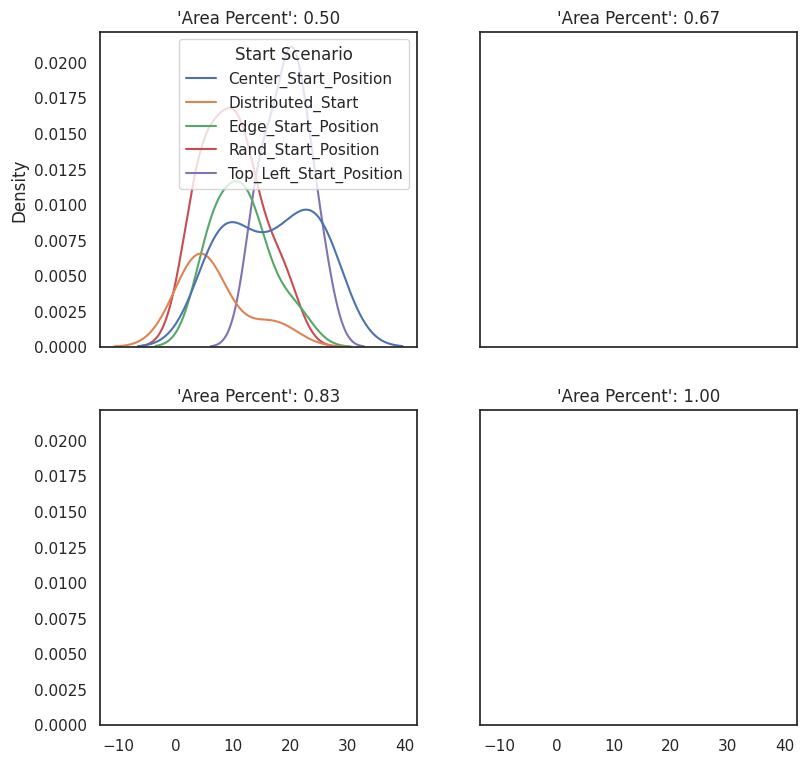

In [27]:
my_kdys_by_percent()